### Python library (scikit-rf) - example: Ring slot, Tee, T line.
<b> ->Jay Gautam, Darmstadt, Germany.\
<i> ->Learning objective:
    1. Different information about the device.
    2. Smith Chart
    3. Scattering parameter- frequency domain, time domain
    4. Phase diagram
    5. Cascading of two network and phase difference   

#### Install the library and import the packagaes.

In [8]:
!pip3 install scikit-rf
# pip install scikit-rf


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import skrf as rf # import the rf module
from skrf.data import ring_slot, line, tee # import the data of a particular model(example- 2 port n/w ring slot device).

import matplotlib.pyplot as plt
import numpy as np

#### Device information

In [10]:
## information about the ring slot device. It imports the impedance matrix in the frequency range 75-110 GHz
ring_slot
# tee
# line

2-Port Network: 'ring slot',  75.0-110.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]

In [11]:
## Several attributes: scattering matrix- attribute of this model.
## ways to see the attributes or property: ring_slot.<click tab>, ring_slot.frequency.<click tab>
# ring_slot.s
ring_slot.s.shape # complex matrix of individual 2X2 matrix with 201 elements. no. of frequencies = 201. no. of port=2
# len(ring_slot.s)
# ring_slot.frequency # frequency property
# ring_slot.frequency.f # frequency vector in terms of GHz
# ring_slot.frequency.f_scaled # scaled frequency vector in terms of GHz

(201, 2, 2)

#### Ring Slot- Smith Chart

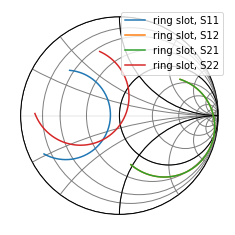

In [12]:
## Smith chart of the ring slot. Information about scattering parameters
ring_slot.plot_s_smith() # polar plot.
#line.plot_s_smith() # polar plot.
#tee.plot_s_smith() # polar plot.

#### Ring Slot- S-Parameter: Frequency and time domain

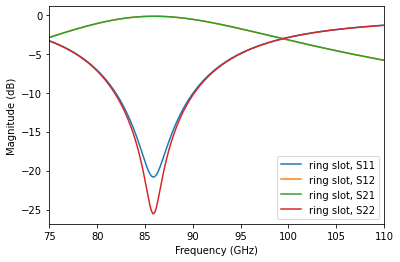

In [13]:
ring_slot.plot_s_db() # dB- scale plot of S parameters- frequency domain. Magnitude plot.

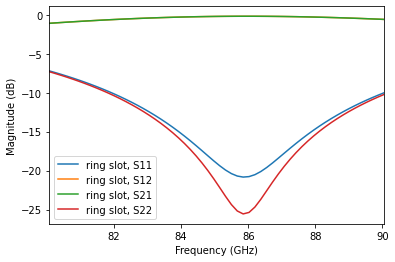

In [24]:
#ring_slot[80:90].plot_s_db() # dB- scale plot of S parameters- frequency domain. Magnitude plot.
ring_slot['80-90ghz'].plot_s_db() # sliced: dB- scale plot of S parameters- frequency domain. Magnitude plot.
#ring_slot['80-90ghz'].plot_s_db(m =0, n=0) # sliced and s11 with m and n value: dB- scale plot of S parameters- frequency domain. Magnitude plot.

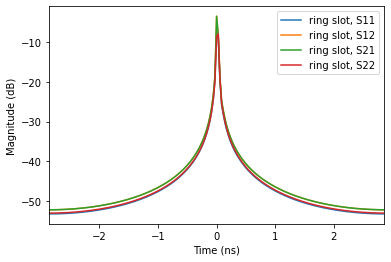

In [15]:
ring_slot.plot_s_time_db() # dB- scale plot of S parameters- time domain

#### Ring Slot- Phase diagram

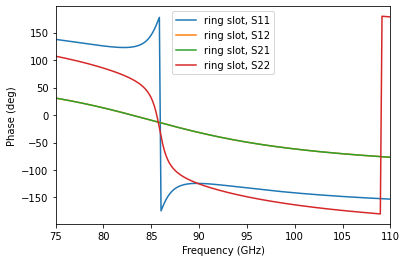

In [16]:
 # phase (in degree) vs frequency plot of S parameters.
ring_slot.plot_s_deg()

#### Ring Slot- cascading two port network

In [19]:
netw11 = ring_slot.copy()
netw12 = ring_slot.copy()
## cascading two 2 port networks- r1 and r2. Currently both are same.
r1=netw11
r2=netw12
netw1 = r1*r2

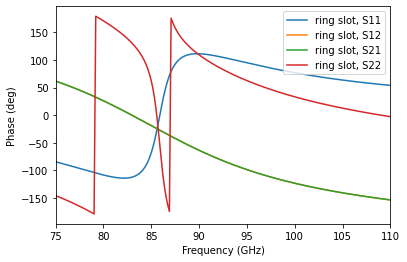

In [20]:
# Phase plot connected network- netw1
netw1.plot_s_deg()

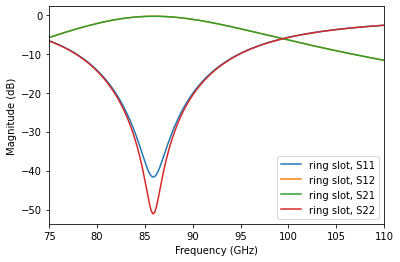

In [21]:
# s-para of connected network: netw1
netw1.plot_s_db() 

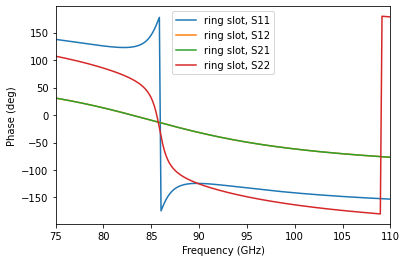

In [22]:
# Finding phase diference of the devices connected together. Complex division equivalent to substraction.
netw_phase_diff = (r1*r2)/r2
netw_phase_diff.plot_s_deg() # it will give the phase plot of r1.